<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Load-le-texte" data-toc-modified-id="Load-le-texte-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load le texte</a></span></li><li><span><a href="#Clean-le-texte" data-toc-modified-id="Clean-le-texte-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Clean le texte</a></span></li><li><span><a href="#Création-de-séquence" data-toc-modified-id="Création-de-séquence-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Création de séquence</a></span></li><li><span><a href="#Sauver-ce-fichier" data-toc-modified-id="Sauver-ce-fichier-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sauver ce fichier</a></span></li><li><span><a href="#Encoder-les-séquences" data-toc-modified-id="Encoder-les-séquences-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Encoder les séquences</a></span></li><li><span><a href="#Séparer-les-données" data-toc-modified-id="Séparer-les-données-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Séparer les données</a></span></li><li><span><a href="#Création-du-model" data-toc-modified-id="Création-du-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Création du model</a></span></li><li><span><a href="#Save-Model" data-toc-modified-id="Save-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Save Model</a></span></li><li><span><a href="#Use-Model" data-toc-modified-id="Use-Model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Use Model</a></span></li></ul></div>

## Import

In [1]:
# MLP for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from tensorflow.keras.utils import to_categorical
import string
import pandas as pd
import numpy as np
from string import punctuation
from os import listdir
from collections import Counter
from keras.preprocessing.text import Tokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/mc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load le texte

In [3]:

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [4]:
# load document
in_filename = '/Users/mc/Documents/Cours/platon_2.txt'
doc = load_doc(in_filename)

## Clean le texte
- (1) Remplacer "-" par un espace
- (2) Séparer les mots en une liste de string
- (3) Enlever la ponctuation (rempalcer par un espace)
- (4) Enlever tout ce qui n'est pas alphabetique
- (5) Passer toutes les majuscules en minuscules
- (6) Print le nombre de Token total, et de Token différent

In [257]:
with open(in_filename , 'r') as fp:
    x = len(fp.readlines())
    print('Total lines:', x) # 8

Total lines: 23719


In [258]:
# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # split into tokens by white space
    tokens = doc.split()
    # remove punctuation from each token
    table = str.maketrans('', '', string.punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

In [259]:
# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

['book', 'i', 'the', 'republic', 'opens', 'with', 'a', 'truly', 'greek', 'scene', 'a', 'festival', 'in', 'honour', 'of', 'the', 'goddess', 'bendis', 'which', 'is', 'held', 'in', 'the', 'piraeus', 'to', 'this', 'is', 'added', 'the', 'promise', 'of', 'an', 'equestrian', 'torchrace', 'in', 'the', 'evening', 'the', 'whole', 'work', 'is', 'supposed', 'to', 'be', 'recited', 'by', 'socrates', 'on', 'the', 'day', 'after', 'the', 'festival', 'to', 'a', 'small', 'party', 'consisting', 'of', 'critias', 'timaeus', 'hermocrates', 'and', 'another', 'this', 'we', 'learn', 'from', 'the', 'first', 'words', 'of', 'the', 'timaeus', 'when', 'the', 'rhetorical', 'advantage', 'of', 'reciting', 'the', 'dialogue', 'has', 'been', 'gained', 'the', 'attention', 'is', 'not', 'distracted', 'by', 'any', 'reference', 'to', 'the', 'audience', 'nor', 'is', 'the', 'reader', 'further', 'reminded', 'of', 'the', 'extraordinary', 'length', 'of', 'the', 'narrative', 'of', 'the', 'numerous', 'company', 'three', 'only', 'take

## Création de séquence
- (1) Séparer le texte en séquence de 51 mots
- (2) Print le nombre total de séquence

In [260]:
# organize into sequences of tokens
length = 50 + 1
sequences = list()
for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)
print('Total Sequences: %d' % len(sequences))

Total Sequences: 210194


## Sauver ce fichier
- (1) Sauver le fichier de séquence

In [261]:
# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()
    

# save sequences to file
out_filename = 'republic_sequences.txt'
save_doc(sequences, out_filename)

In [262]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [263]:
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

## Encoder les séquences
- (1) Tokenize les séquences avec le tokenizers de Keras
- (2) Trouver la taille du Vocabulaire et créer une variable de cette valeur + 1

In [264]:
# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

In [265]:
# vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

10271


## Séparer les données
- (1) Créer le X d'entrainement et Y de test
    - X prends les 50 premières valeurs
    - Y prends la dernière valeur de chaque séquence
    
- (2) Utiliser la fonction to_categorical pour créer un hot-encoder de Y

In [266]:
sequences = np.array(sequences)
X, Y = sequences[:,:-1], sequences[:,-1]
Y = to_categorical(Y, num_classes=vocab_size)
seq_length = X.shape[1]

In [267]:
print(X.shape)
print(Y.shape)

(210194, 50)
(210194, 10271)


In [359]:
X.shape[2]

IndexError: tuple index out of range

In [357]:
X.shape[1]

50

In [360]:
X = X.reshape(X.shape[0], X.shape[1], 1)
X = X/float(Y.shape[1])

## Création du model

In [361]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [362]:
# define model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
#model.add(Embedding(vocab_size, 50, input_length=seq_length))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(100, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

KeyboardInterrupt: 

In [ ]:
(vocab_size, 50, input_length=seq_length)

In [18]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
model.fit(tf.convert_to_tensor(X[:,:]),tf.convert_to_tensor(Y[:,:]) , batch_size=128, epochs=100)



InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

## Save Model

In [268]:
from pickle import dump
# save the model to file
#model.save('model_platon_total.h5')
# save the tokenizer
#dump(tokenizer, open('tokenizer.pkl', 'wb'))

## Use Model

In [5]:
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

In [6]:
# load the model
model = load_model('model_platon_total_2.h5')
# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

2022-05-31 08:34:10.494063: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-31 08:34:10.494335: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1


- (1) Selectionner une phrase du texte
- (2) Tokenizer cette phrase comme fait avant le training 
- (3) Prédire la classe en utilisant cette phrase

In [164]:
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

imitation and the user furnishes the rule to the two others the fluteplayer will know the good and bad flute and the maker will put faith in him but the imitator will neither know nor have faith neither science nor true opinion can be ascribed to him imitation then is devoid



In [80]:
def predict(model, seed_text):
    encoded = tokenizer.texts_to_sequences([seed_text])[0][:-1]
    yhat = model.predict(np.array(encoded).reshape(len(encoded), 1), verbose=0)
    return np.argmax(yhat,axis=1)[0] 

def find_word(mydict, value):
    return list(mydict.keys())[list(mydict.values()).index(value)]

value = predict(model, seed_text)
noun = find_word(tokenizer.word_index, value)
noun

'ships'

0

In [85]:
len(seed_text.split()[i:]+nounS)

51

In [91]:
number_pred = 6
nounS = []
noun_predicted = []
for i in range(0, number_pred):
    if i>0:
        nounS.append(noun)
    value = predict(model,  seed_text.split()[i:]+nounS)
    noun = find_word(tokenizer.word_index, value)
    print(noun)
    noun_predicted.append(noun)

ships
years


ValueError: 0 is not in list

In [138]:
seed_text*2

'having lost his best guardian who was that said adeimantus philosophy i said tempered with music who comes and takes up her abode in a man and is the only saviour of his virtue throughout life good he said such i said is the timocratical youth and he is like thehaving lost his best guardian who was that said adeimantus philosophy i said tempered with music who comes and takes up her abode in a man and is the only saviour of his virtue throughout life good he said such i said is the timocratical youth and he is like the'

In [134]:
# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

having lost his best guardian who was that said adeimantus philosophy i said tempered with music who comes and takes up her abode in a man and is the only saviour of his virtue throughout life good he said such i said is the timocratical youth and he is like the



In [157]:
encoded

array([[ 596,   25,  149,  503,   30,   50,    9,   27,  407,  151,   15,
          27, 6074,   28,  260,   30,  370,    3,  612,  116,  118, 2056,
           6,    7,   54,    3,    5,    1,   51, 2253,    2,   25,  158,
        2241,   77,   47,    8,   27,   69,   15,   27,    5,    1, 2623,
         217,    3,    8,    5,   60,    1]], dtype=int32)

In [162]:
def predict_2(model, encoded):
    #encoded = tokenizer.texts_to_sequences([seed_text])[0][:-1]
    yhat = model.predict(np.array(encoded), verbose=0)
    return np.argmax(yhat,axis=1)[0] 

n_words = 30

result = list()
in_text = seed_text 
# generate a fixed number of words
for _ in range(n_words):
    # encode the text as integer
    encoded = tokenizer.texts_to_sequences([in_text])[0]

    encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
    yhat = predict_2(model, encoded)
    # map predicted word index to word
    out_word = ''
    for word, index in tokenizer.word_index.items():
        if index == yhat:
            out_word = word
            break
    # append to input
    in_text += ' ' + out_word
    result.append(out_word)
' '.join(result)

'average tyrant as the ground is preserved by the other rivergod spercheius and the harmonious state is that the soul of er is five and christian building perfection is not'

'in'

In [136]:
from random import randint
from pickle import load
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

# generate a sequence from a language model
def generate_seq(model, tokenizer, seq_length, seed_text, n_words):
    result = list()
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # predict probabilities for each word
        predict_x=model.predict(np.array(encoded).reshape(seq_length, 1))
        yhat=np.argmax(predict_x,axis=1)
        #yhat = model.predict_classes(encoded, verbose=0)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            print(yhat)
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
        result.append(out_word)
    return ' '.join(result)

# load cleaned text sequences
in_filename = 'republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')
seq_length = len(lines[0].split()) - 1

# load the model
model = load_model('model_platon_half.h5')

# load the tokenizer
tokenizer = load(open('tokenizer.pkl', 'rb'))

# select a seed text
seed_text = lines[randint(0,len(lines))]
print(seed_text + '\n')

# generate new text
generated = generate_seq(model, tokenizer, seq_length, seed_text, 50)
print(generated)

that the difference may be purely nominal and accidental for example a bald man and a hairy man are opposed in a single point of view but you cannot infer that because a bald man is a cobbler a hairy man ought not to be a cobbler now why is such

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


2022-05-24 13:51:38.258178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-24 13:51:38.323748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-24 13:51:38.353410: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [33]:
# predict probabilities for each word
yhat = model.predict(np.array(encoded).reshape(50,1))
yhat

array([[9.2060800e-05, 1.5788604e-04, 1.5197188e-04, ..., 9.1784590e-05,
        9.2009119e-05, 9.1935581e-05],
       [9.1674396e-05, 1.6288036e-04, 1.5676218e-04, ..., 9.1372058e-05,
        9.1636743e-05, 9.1586968e-05],
       [9.3009774e-05, 1.4545683e-04, 1.4029625e-04, ..., 9.2921386e-05,
        9.2955561e-05, 9.2925686e-05],
       ...,
       [9.1816226e-05, 1.6095990e-04, 1.5498257e-04, ..., 9.1549118e-05,
        9.1780028e-05, 9.1739341e-05],
       [9.3126589e-05, 1.4399327e-04, 1.3893103e-04, ..., 9.3056966e-05,
        9.3061935e-05, 9.3026581e-05],
       [9.1932117e-05, 1.5942122e-04, 1.5338266e-04, ..., 9.1647409e-05,
        9.1892507e-05, 9.1812231e-05]], dtype=float32)

In [39]:
np.argmax(yhat[0,3])

0

<AxesSubplot:>

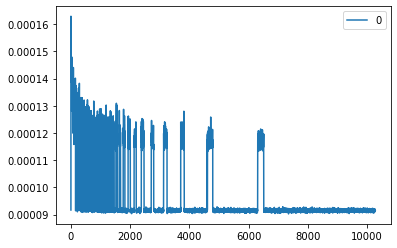

In [42]:
pd.DataFrame(yhat[1,:]).plot()

<AxesSubplot:>

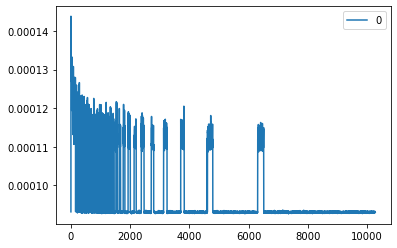

In [43]:
pd.DataFrame(yhat[45,:]).plot()